In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('/content/instagram_inluencers.xlsx')
df.head()

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M
2,3,neymarjr,NJ ðŸ‡§ðŸ‡·,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M
3,4,kyliejenner,Kylie ðŸ¤,Fashion,Modeling,376.3M,United States,2.7M,4.3M
4,5,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M


## Visualizing the Null and Non-Null Values in the Dataset

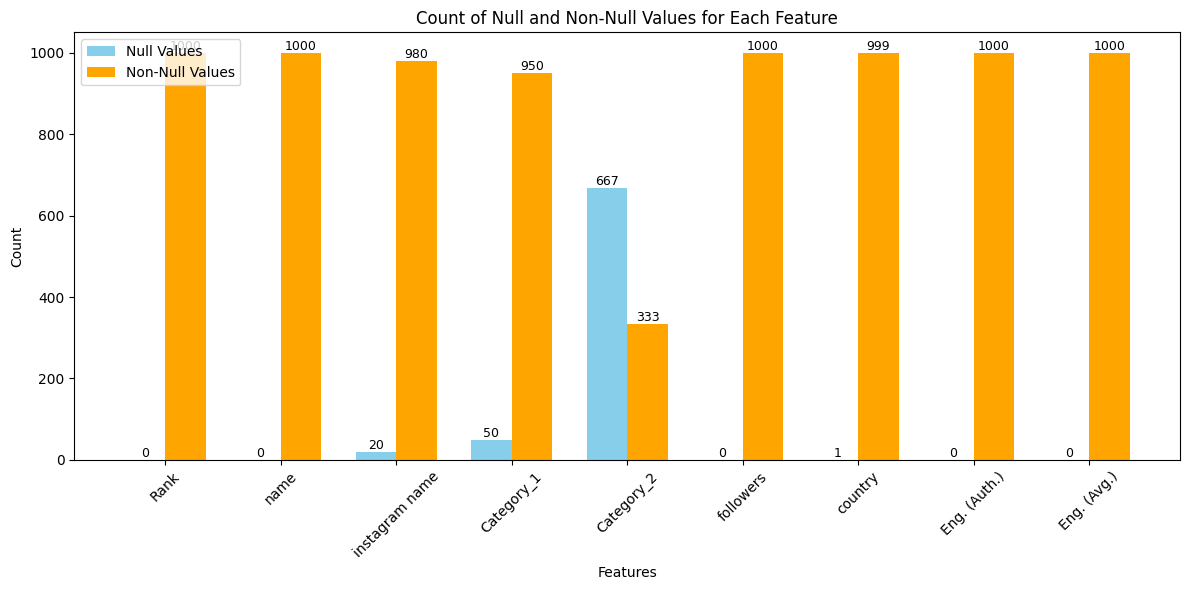

In [3]:
# Calculate the count of null and non-null values for each feature
null_counts = df.isnull().sum()
nonnull_counts = df.notnull().sum()

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars
indices = np.arange(len(null_counts))

# Plot the count of null values using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(indices, null_counts.values, bar_width, color='skyblue', label='Null Values')

# Plot the count of non-null values using a bar plot
plt.bar(indices + bar_width, nonnull_counts.values, bar_width, color='orange', label='Non-Null Values')

# Add text annotations with the count of null values above each bar
for i, value in enumerate(null_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=9, color='black')

# Add text annotations with the count of non-null values above each bar
for i, value in enumerate(nonnull_counts.values):
    plt.text(i + bar_width, value, str(value), ha='center', va='bottom', fontsize=9, color='black')

# Set the x-axis labels
plt.xticks(indices + bar_width / 2, null_counts.index, rotation=45)

# Add legend and labels
plt.legend()
plt.title('Count of Null and Non-Null Values for Each Feature')
plt.xlabel('Features')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Removing Null Values from Instagram_Name and country column by replacing it with 'N/A' and 'Other' Respectively

In [4]:
df['instagram name'].fillna('N/A',inplace=True)
df['country'].fillna('Other',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            1000 non-null   int64 
 1   name            1000 non-null   object
 2   instagram name  1000 non-null   object
 3   Category_1      950 non-null    object
 4   Category_2      333 non-null    object
 5   followers       1000 non-null   object
 6   country         1000 non-null   object
 7   Eng. (Auth.)    1000 non-null   object
 8   Eng. (Avg.)     1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


### Renaming the Eng. (Auth.) to Authentic_Engagement & Eng. (Avg.) to Average_Engagement

In [5]:
# Rename the columns
df.rename(columns={'Eng. (Auth.)': 'Authentic_Engagement', 'Eng. (Avg.)': 'Average_Engagement'}, inplace=True)

# Print the DataFrame to verify the column names have been changed
df.head()

,Rank,name,instagram name,Category_1,Category_2,followers,country,Authentic_Engagement,Average_Engagement
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M
2,3,neymarjr,NJ ðŸ‡§ðŸ‡·,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M
3,4,kyliejenner,Kylie ðŸ¤,Fashion,Modeling,376.3M,United States,2.7M,4.3M
4,5,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M


### Convert 'followers', 'Authentic_Engagement', 'Average_Engagement' into numerical columns.

In [6]:
# Define the columns to convert
columns_to_convert = ['followers', 'Authentic_Engagement', 'Average_Engagement']

# Define conversion factors for 'B' and 'k'
conversion_factors = {'B': 1e9, 'M': 1e6, 'k': 1e3}

# Convert the specified columns to numerical format
for column in columns_to_convert:
    df[column] = df[column].astype(str).str.replace('B', 'e9').str.replace('M', 'e6').str.replace('K', 'e3').astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  1000 non-null   int64  
 1   name                  1000 non-null   object 
 2   instagram name        1000 non-null   object 
 3   Category_1            950 non-null    object 
 4   Category_2            333 non-null    object 
 5   followers             1000 non-null   float64
 6   country               1000 non-null   object 
 7   Authentic_Engagement  1000 non-null   float64
 8   Average_Engagement    1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [8]:
# Count the occurrences of each category in Category_1 and Category_2, including null values
category_1_counts = df['Category_1'].fillna('Unknown').value_counts()
category_2_counts = df['Category_2'].fillna('Unknown').value_counts()

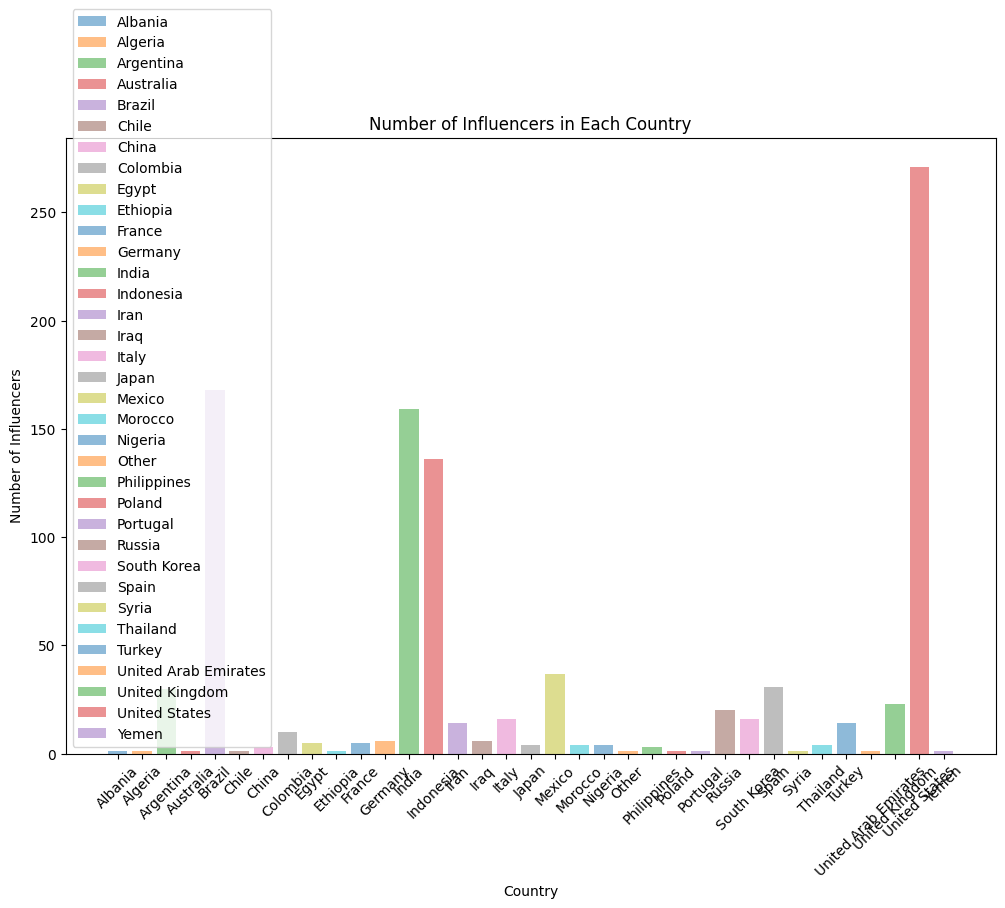

In [9]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Country' and count the occurrences of each 'Instagram Name' within each country
country_grouped = df.groupby('country')['instagram name'].count()

# Plot a bar plot for each country
plt.figure(figsize=(12, 8))
for country, count in country_grouped.items():
    plt.bar(country, count, alpha=0.5, label=country)

plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.title('Number of Influencers in Each Country')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## EDA of Influencers with respect to Countries.

In [10]:
# Count the number of unique countries in the 'Country' column
num_countries = df['country'].nunique()
unique_countries = df['country'].unique()
print("Number of unique countries in the dataset:", num_countries)
print("Unique countries in the dataset:", unique_countries)


Number of unique countries in the dataset: 35
Unique countries in the dataset: ['Argentina' 'India' 'Brazil' 'United States' 'France' 'South Korea'
 'Indonesia' 'Other' 'Mexico' 'Ethiopia' 'Spain' 'Turkey' 'Italy'
 'Morocco' 'Poland' 'China' 'United Kingdom' 'Iran' 'Russia' 'Colombia'
 'Australia' 'Philippines' 'Yemen' 'Egypt' 'United Arab Emirates'
 'Germany' 'Thailand' 'Portugal' 'Nigeria' 'Iraq' 'Japan' 'Algeria'
 'Albania' 'Syria' 'Chile']


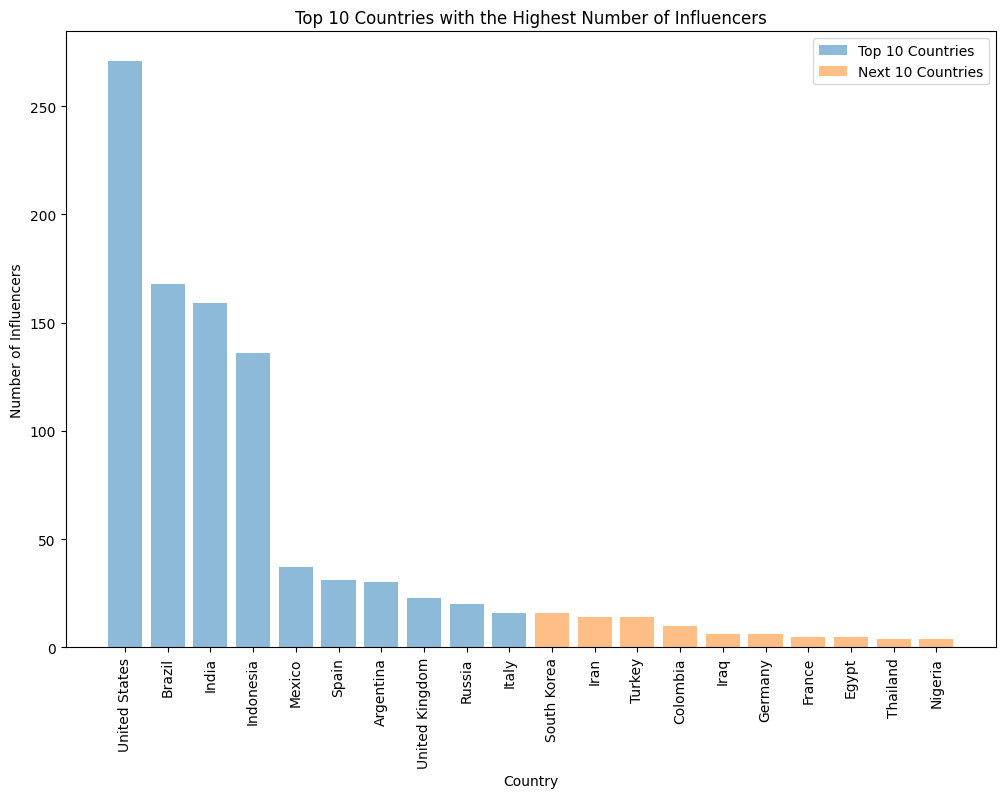

In [11]:
import matplotlib.pyplot as plt

# Count the occurrences of each country
country_counts = df['country'].value_counts()

# Get the top 10 countries with the highest number of influencers
top_10_countries = country_counts.head(10)

# Get the next 10 countries after excluding the top 10
other_10_countries = country_counts.iloc[10:20]

# Plot the bar plot
plt.figure(figsize=(12, 8))

# Plot top 10 countries
plt.bar(top_10_countries.index, top_10_countries.values, alpha=0.5, label='Top 10 Countries')

# Plot next 10 countries
plt.bar(other_10_countries.index, other_10_countries.values, alpha=0.5, label='Next 10 Countries')

plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.title('Top 10 Countries with the Highest Number of Influencers')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [12]:
# Group the DataFrame by 'Country' and calculate the sum of followers for each country
country_followers = df.groupby('country')['followers'].sum()

# Select the top 10 countries with the highest total followers
top_10_countries = country_followers.nlargest(10)
print("Total followers in the top 10 country:", top_10_countries)


Total followers in the top 10 country: country
United States     9.152600e+09
India             5.700500e+09
Brazil            4.285700e+09
Indonesia         2.478500e+09
Argentina         8.802000e+08
Spain             7.564000e+08
Mexico            6.748000e+08
United Kingdom    3.915000e+08
Russia            3.161000e+08
Italy             2.866000e+08
Name: followers, dtype: float64


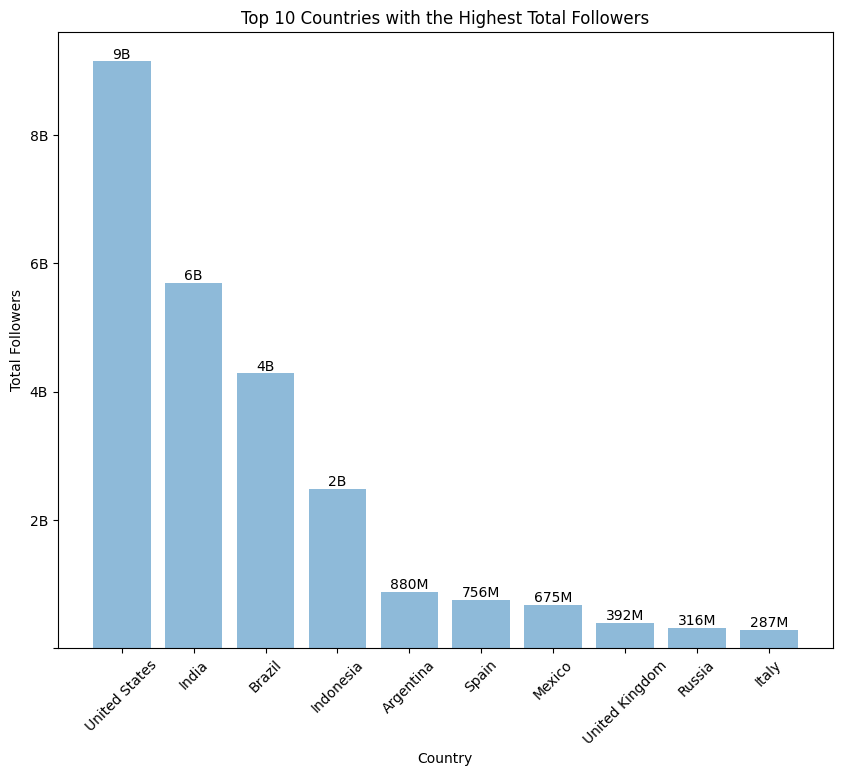

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Function to format y-axis labels
def format_yticks(value, pos):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'  # Convert to billions
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'  # Convert to millions
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'  # Convert to thousands
    else:
        return ''  # Return empty string for values less than 1K

# Group the DataFrame by 'Country' and calculate the sum of followers for each country
country_followers = df.groupby('country')['followers'].sum()

# Select the top 10 countries with the highest total followers
top_10_countries = country_followers.nlargest(10)

# Plot the bar plot for the top 10 countries
plt.figure(figsize=(10, 8))
bars = plt.bar(top_10_countries.index, top_10_countries.values, alpha=0.5)
plt.xlabel('Country')
plt.ylabel('Total Followers')
plt.title('Top 10 Countries with the Highest Total Followers')
plt.xticks(rotation=45)

# Apply custom y-axis formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))

# Add text annotations on top of each bar with formatted label (without numerical value)
for bar in bars:
    yval = bar.get_height()
    label = format_yticks(yval, None)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, label, va='bottom', ha='center')

plt.show()


In [14]:
# Perform one-hot encoding for the 'Category_1' column
category1_encoded = pd.get_dummies(df['Category_1'], prefix='Category_1')

# Perform one-hot encoding for the 'Category_2' column
category2_encoded = pd.get_dummies(df['Category_2'], prefix='Category_2')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, category1_encoded, category2_encoded], axis=1)

# Drop the original 'Category_1' and 'Category_2' columns
df_encoded.drop(['Category_1', 'Category_2'], axis=1, inplace=True)

# Display the encoded DataFrame
print(df_encoded.head())

   Rank           name     instagram name    followers        country  \
0     1       leomessi          Leo Messi  409800000.0      Argentina   
1     2      cristiano  Cristiano Ronaldo  523000000.0          India   
2     3       neymarjr        NJ ðŸ‡§ðŸ‡·  198900000.0         Brazil   
3     4    kyliejenner         Kylie ðŸ¤  376300000.0  United States   
4     5  kendalljenner            Kendall  268000000.0  United States   

   Authentic_Engagement  Average_Engagement  Category_1_Adult content  \
0            17800000.0          23400000.0                         0   
1            11700000.0          14700000.0                         0   
2             6700000.0           9500000.0                         0   
3             2700000.0           4300000.0                         0   
4             3200000.0           5000000.0                         0   

   Category_1_Animals  Category_1_Art/Artists  ...  Category_2_NFT  \
0                   0                       0  ...  

In [15]:
# Perform one-hot encoding for the 'Country' column
country_encoded = pd.get_dummies(df['country'], prefix='Country')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_encoded, country_encoded], axis=1)

# Drop the original 'Country' column
df_encoded.drop('country', axis=1, inplace=True)

# Display the encoded DataFrame
print(df_encoded.head())


   Rank           name     instagram name    followers  Authentic_Engagement  \
0     1       leomessi          Leo Messi  409800000.0            17800000.0   
1     2      cristiano  Cristiano Ronaldo  523000000.0            11700000.0   
2     3       neymarjr        NJ ðŸ‡§ðŸ‡·  198900000.0             6700000.0   
3     4    kyliejenner         Kylie ðŸ¤  376300000.0             2700000.0   
4     5  kendalljenner            Kendall  268000000.0             3200000.0   

   Average_Engagement  Category_1_Adult content  Category_1_Animals  \
0          23400000.0                         0                   0   
1          14700000.0                         0                   0   
2           9500000.0                         0                   0   
3           4300000.0                         0                   0   
4           5000000.0                         0                   0   

   Category_1_Art/Artists  Category_1_Beauty  ...  Country_Russia  \
0                      

In [16]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Define the columns to be scaled
columns_to_scale = ['followers', 'Authentic_Engagement', 'Average_Engagement']

# Fit and transform the selected columns
df_scaled = df.copy()  # Make a copy of the DataFrame
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# Display the scaled DataFrame
print(df_scaled.head())


   Rank           name     instagram name          Category_1 Category_2  \
0     1       leomessi          Leo Messi  Sports with a ball     Family   
1     2      cristiano  Cristiano Ronaldo  Sports with a ball        NaN   
2     3       neymarjr        NJ ðŸ‡§ðŸ‡·  Sports with a ball        NaN   
3     4    kyliejenner         Kylie ðŸ¤             Fashion   Modeling   
4     5  kendalljenner            Kendall            Modeling    Fashion   

   followers        country  Authentic_Engagement  Average_Engagement  
0   8.313532      Argentina             16.266801           17.287626  
1  10.769689          India             10.492953           10.624143  
2   3.737529         Brazil              5.760291            6.641372  
3   7.586666  United States              1.974161            2.658601  
4   5.236826  United States              2.447427            3.194743  


In [17]:
# Calculate average engagement per follower
df['Average_Engagement_Per_Follower'] = (df['Authentic_Engagement'] + df['Average_Engagement']) / df['followers']

# Estimate reach
df['Estimated_Reach'] = df['Average_Engagement_Per_Follower'] * df['followers']

# Display the DataFrame with the new estimated reach column
print(df.head())


   Rank           name     instagram name          Category_1 Category_2  \
0     1       leomessi          Leo Messi  Sports with a ball     Family   
1     2      cristiano  Cristiano Ronaldo  Sports with a ball        NaN   
2     3       neymarjr        NJ ðŸ‡§ðŸ‡·  Sports with a ball        NaN   
3     4    kyliejenner         Kylie ðŸ¤             Fashion   Modeling   
4     5  kendalljenner            Kendall            Modeling    Fashion   

     followers        country  Authentic_Engagement  Average_Engagement  \
0  409800000.0      Argentina            17800000.0          23400000.0   
1  523000000.0          India            11700000.0          14700000.0   
2  198900000.0         Brazil             6700000.0           9500000.0   
3  376300000.0  United States             2700000.0           4300000.0   
4  268000000.0  United States             3200000.0           5000000.0   

   Average_Engagement_Per_Follower  Estimated_Reach  
0                         0.100537    

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical columns (Category_1, Category_2, Country) using one-hot encoding
categorical_columns = ['Category_1', 'Category_2', 'country']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])

# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame for the encoded categorical variables
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_feature_names)

# Combine encoded categorical variables with numerical features
X = pd.concat([df[['followers', 'Authentic_Engagement', 'Average_Engagement']], encoded_df], axis=1)
y = df['Estimated_Reach']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models and continue with the training and evaluation steps as before...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


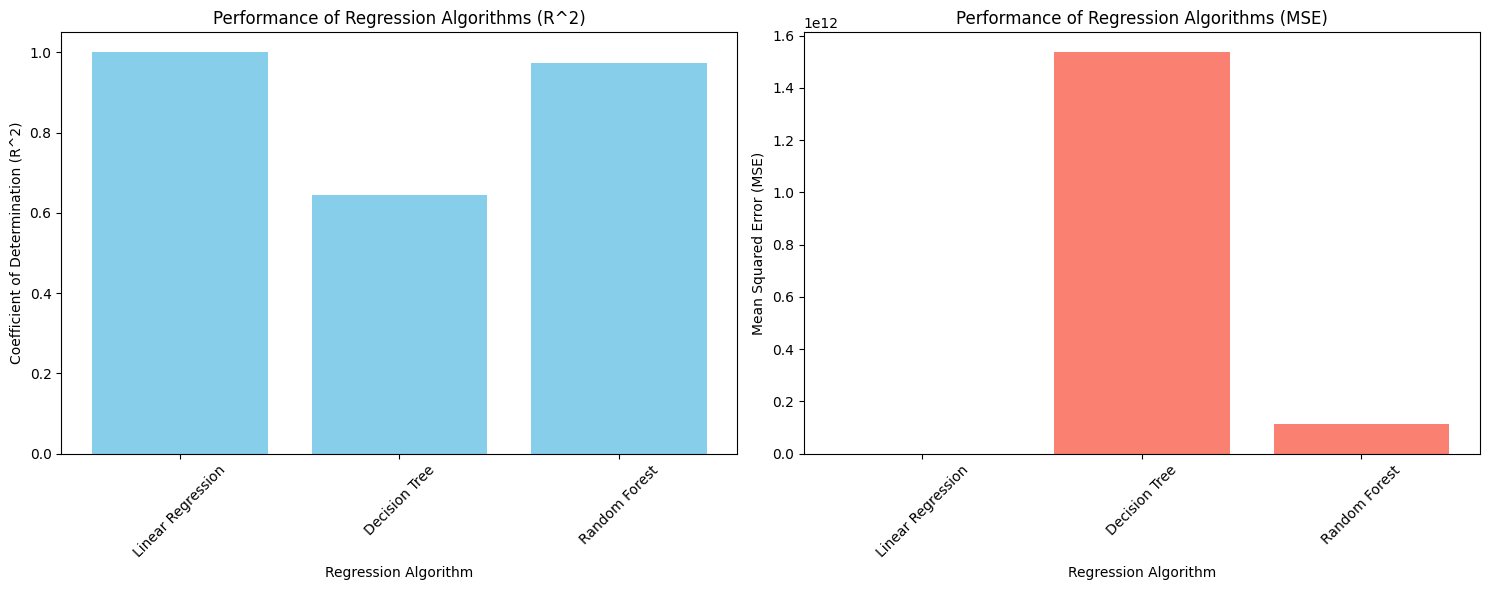

In [27]:
from sklearn.metrics import mean_squared_error

# Train and evaluate models
r2_scores = {}
mse_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_scores[name] = r2
    mse_scores[name] = mse

# Plot the R^2 scores
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.xlabel('Regression Algorithm')
plt.ylabel('Coefficient of Determination (R^2)')
plt.title('Performance of Regression Algorithms (R^2)')
plt.xticks(rotation=45)

# Plot the MSE scores
plt.subplot(1, 2, 2)
plt.bar(mse_scores.keys(), mse_scores.values(), color='salmon')
plt.xlabel('Regression Algorithm')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Performance of Regression Algorithms (MSE)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [28]:
import pickle

# Initialize and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Save the trained model as a pickle file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linear_regression_model, file)

In [32]:
import pandas as pd

# Extract unique country names
unique_countries = df['country'].unique().tolist()

print(unique_countries)


['Argentina', 'India', 'Brazil', 'United States', 'France', 'South Korea', 'Indonesia', 'Other', 'Mexico', 'Ethiopia', 'Spain', 'Turkey', 'Italy', 'Morocco', 'Poland', 'China', 'United Kingdom', 'Iran', 'Russia', 'Colombia', 'Australia', 'Philippines', 'Yemen', 'Egypt', 'United Arab Emirates', 'Germany', 'Thailand', 'Portugal', 'Nigeria', 'Iraq', 'Japan', 'Algeria', 'Albania', 'Syria', 'Chile']


In [34]:
# Extract unique categories from Category 1 and Category 2 columns
categories_1 = df['Category_1'].unique().tolist()
categories_2 = df['Category_2'].unique().tolist()

# Combine the lists and remove 'nan' value
unique_categories = set(categories_1 + categories_2)
unique_categories.discard('nan')

print(list(unique_categories))

['Music', 'Photography', 'Modeling', 'Lifestyle', 'Family', 'Shopping & Retail', 'Cinema & Actors/actresses', 'Travel', 'Fashion', 'Politics', 'Education', 'Beauty', 'Gaming', 'Nature & landscapes', 'Animals', 'Literature & Journalism', 'Finance & Economics', 'Luxury', 'Sports with a ball', 'Computers & Gadgets', 'Trainers & Coaches', 'Business & Careers', 'Winter sports', 'Cars & Motorbikes', 'NFT', 'Water sports', 'Clothing & Outfits', 'Comics & sketches', 'Management & Marketing', 'Kids & Toys', 'Machinery & Technologies', 'Science', 'Food & Cooking', 'Fitness & Gym', 'Humor & Fun & Happiness', 'Art/Artists', 'Shows', 'Racing Sports', 'Adult content', nan]
